In [2]:
import pandas as pd
from datetime import datetime, timedelta
from scipy import integrate, optimize
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# data preprocessing
data = pd.read_csv('owid-covid-data.csv')
country = 'China'
country_data = data[data.location == country]
country_data = country_data[country_data['total_cases'] > 0]
country_data

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
2784,CHN,China,2019-12-31,27,27,0,0,0.019,0.019,0.000,0.0,NaN,NaN,NaN,NaN,NaN
2785,CHN,China,2020-01-01,27,0,0,0,0.019,0.000,0.000,0.0,NaN,NaN,NaN,NaN,NaN
2786,CHN,China,2020-01-02,27,0,0,0,0.019,0.000,0.000,0.0,NaN,NaN,NaN,NaN,NaN
2787,CHN,China,2020-01-03,44,17,0,0,0.031,0.012,0.000,0.0,NaN,NaN,NaN,NaN,NaN
2788,CHN,China,2020-01-04,44,0,0,0,0.031,0.000,0.000,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,CHN,China,2020-05-04,83964,3,4637,0,58.336,0.002,3.222,0.0,NaN,NaN,NaN,NaN,NaN
2910,CHN,China,2020-05-05,83966,2,4637,0,58.337,0.001,3.222,0.0,NaN,NaN,NaN,NaN,NaN
2911,CHN,China,2020-05-06,83968,2,4637,0,58.339,0.001,3.222,0.0,NaN,NaN,NaN,NaN,NaN
2912,CHN,China,2020-05-07,83970,2,4637,0,58.340,0.001,3.222,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# split data according to selected date

# United Kingdom
# country_data1 = country_data[(country_data['date'] >= '2020-01-31') & (country_data['date'] <= '2020-03-18')]
# country_data2 = country_data[(country_data['date'] > '2020-03-18') & (country_data['date'] <= '2020-04-30')]
# country_data3 = country_data[(country_data['date'] > '2020-04-30')]

# China
country_data1 = country_data[(country_data['date'] >= '2019-12-31') & (country_data['date'] <= '2020-01-24')]
country_data2 = country_data[(country_data['date'] > '2020-01-24') & (country_data['date'] <= '2020-02-12')]
country_data3 = country_data[(country_data['date'] > '2020-02-12')]

# Turkey
# country_data1 = country_data[(country_data['date'] >= '2020-03-12') & (country_data['date'] <= '2020-03-16')]
# country_data2 = country_data[(country_data['date'] > '2020-03-16') & (country_data['date'] <= '2020-04-20')]
# country_data3 = country_data[(country_data['date'] > '2020-04-20')]

# population
pop_dict = {'United Kingdom': 67900000, 'Italy': 60500000, 'China': 1400050000, 'Turkey': 83200000}
pop = pop_dict[country]

# time interval
t_interval1 = np.arange(len(country_data1))
t_interval2 = np.arange(len(country_data2))
t_interval3 = np.arange(len(country_data3))

# daily new cases
daily_new_cases1 = country_data1['new_cases'].values
daily_new_cases2 = country_data2['new_cases'].values
daily_new_cases3 = country_data3['new_cases'].values

In [5]:
# evaluation meric
def evaluate(actual, predict):
    score = r2_score(actual, predict)
    return score

In [6]:
# SIR model
# initial values stage 1
I0 = daily_new_cases1[0]
S0 = pop - I0
R0 = 0

# beta: contagion rate  gamma: recovery rate
def SIR(sir, t, beta, gamma):
    S, I, R = sir 
    dsdt = - beta * S * I / pop
    drdt = gamma * I
    didt = -(dsdt + drdt)
    return [dsdt, didt, drdt]

In [7]:
# solve SIR model
def solve_SIR(t, beta, gamma):
    out1 = integrate.odeint(SIR, [S0, I0, R0], t, args=(beta, gamma))
    print(out1[:,0])
    return out1[:,1]

# fit SIR model
popt_sir, pcov_sir = optimize.curve_fit(solve_SIR, t_interval1, daily_new_cases1, maxfev=2000)

[1.40004997e+09 1.40004995e+09 1.40004992e+09 1.40004989e+09
 1.40004987e+09 1.40004984e+09 1.40004981e+09 1.40004978e+09
 1.40004976e+09 1.40004973e+09 1.40004970e+09 1.40004968e+09
 1.40004965e+09 1.40004962e+09 1.40004960e+09 1.40004957e+09
 1.40004954e+09 1.40004951e+09 1.40004949e+09 1.40004946e+09
 1.40004943e+09 1.40004941e+09 1.40004938e+09 1.40004935e+09
 1.40004933e+09]
[1.40004997e+09 1.40004995e+09 1.40004992e+09 1.40004989e+09
 1.40004987e+09 1.40004984e+09 1.40004981e+09 1.40004978e+09
 1.40004976e+09 1.40004973e+09 1.40004970e+09 1.40004968e+09
 1.40004965e+09 1.40004962e+09 1.40004960e+09 1.40004957e+09
 1.40004954e+09 1.40004951e+09 1.40004949e+09 1.40004946e+09
 1.40004943e+09 1.40004941e+09 1.40004938e+09 1.40004935e+09
 1.40004933e+09]
[1.40004997e+09 1.40004995e+09 1.40004992e+09 1.40004989e+09
 1.40004987e+09 1.40004984e+09 1.40004981e+09 1.40004978e+09
 1.40004976e+09 1.40004973e+09 1.40004970e+09 1.40004968e+09
 1.40004965e+09 1.40004962e+09 1.40004960e+09 1.400

In [8]:
# predict
# generate date
start_date = country_data1.date.iloc[0]
days = len(t_interval1)
date_interval1 = [(datetime.strptime(start_date, '%Y-%m-%d') + timedelta(days=i)) for i in range(days)]
prediction1 = solve_SIR(t_interval1, *popt_sir)

[1.40004997e+09 1.40005021e+09 1.40005046e+09 1.40005073e+09
 1.40005101e+09 1.40005131e+09 1.40005162e+09 1.40005196e+09
 1.40005232e+09 1.40005269e+09 1.40005309e+09 1.40005352e+09
 1.40005396e+09 1.40005444e+09 1.40005494e+09 1.40005548e+09
 1.40005605e+09 1.40005665e+09 1.40005728e+09 1.40005796e+09
 1.40005867e+09 1.40005943e+09 1.40006023e+09 1.40006108e+09
 1.40006198e+09]


In [9]:
# visualize
def vis(stage, time, predict, actual):
    plt.figure(stage, figsize=(15, 5))
    plt.plot(time, predict, c='r', label='Fitted Value')
    plt.bar(time, actual, label='Actual Value')
    plt.title('Daily new cases modeling of ' + country + ' using SIR model ' + 'stage ' + str(stage))
    plt.ylabel('Daily New Cases')
    plt.xlabel('Date')
    plt.xlim(time[0], time[-1])
    plt.grid()
    plt.legend()
    plt.savefig('multi_stage/' + country + '_sir_' + str(stage) + '.png')
    plt.show()

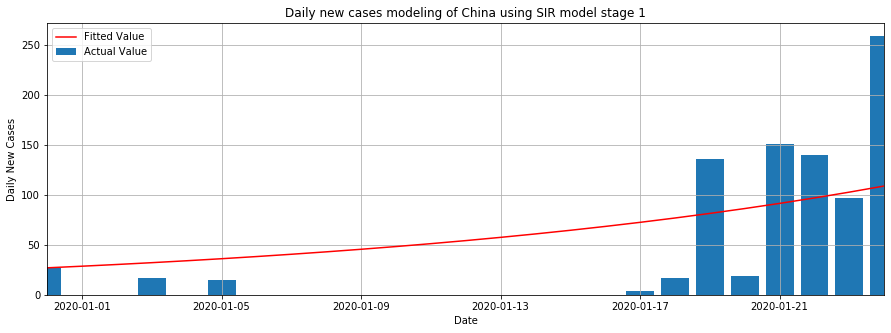

In [10]:
vis(1, date_interval1, prediction1, daily_new_cases1)

In [11]:
evaluate(daily_new_cases1, prediction1) #stage 1

0.27797226211476234

In [12]:
# initial values stage 2
I0_2 = daily_new_cases1[-1]
S0_2 = 1.40006198e+09
R0_2 = pop - I0_2 - S0_2

# solve SIR model
def solve_SIR(t, beta, gamma):
    out2 = integrate.odeint(SIR, [S0_2, I0_2, R0_2], t, args=(beta, gamma))
    print(out2[:,0])
    return out2[:,1]

# fit SIR model
popt_sir, pcov_sir = optimize.curve_fit(solve_SIR, t_interval2, daily_new_cases2, maxfev=2000)


# generate date
start_date = country_data2.date.iloc[0]
days = len(t_interval2)
date_interval2 = [(datetime.strptime(start_date, '%Y-%m-%d') + timedelta(days=i)) for i in range(days)]
prediction2 = solve_SIR(t_interval2, *popt_sir)

[1.40006198e+09 1.40006172e+09 1.40006146e+09 1.40006120e+09
 1.40006094e+09 1.40006068e+09 1.40006043e+09 1.40006017e+09
 1.40005991e+09 1.40005965e+09 1.40005939e+09 1.40005913e+09
 1.40005887e+09 1.40005861e+09 1.40005835e+09 1.40005809e+09
 1.40005784e+09 1.40005758e+09 1.40005732e+09]
[1.40006198e+09 1.40006172e+09 1.40006146e+09 1.40006120e+09
 1.40006094e+09 1.40006068e+09 1.40006043e+09 1.40006017e+09
 1.40005991e+09 1.40005965e+09 1.40005939e+09 1.40005913e+09
 1.40005887e+09 1.40005861e+09 1.40005835e+09 1.40005809e+09
 1.40005784e+09 1.40005758e+09 1.40005732e+09]
[1.40006198e+09 1.40006172e+09 1.40006146e+09 1.40006120e+09
 1.40006094e+09 1.40006068e+09 1.40006043e+09 1.40006017e+09
 1.40005991e+09 1.40005965e+09 1.40005939e+09 1.40005913e+09
 1.40005887e+09 1.40005861e+09 1.40005835e+09 1.40005809e+09
 1.40005784e+09 1.40005758e+09 1.40005732e+09]
[1.40006198e+09 1.40006172e+09 1.40006146e+09 1.40006120e+09
 1.40006094e+09 1.40006068e+09 1.40006043e+09 1.40006017e+09
 1.40

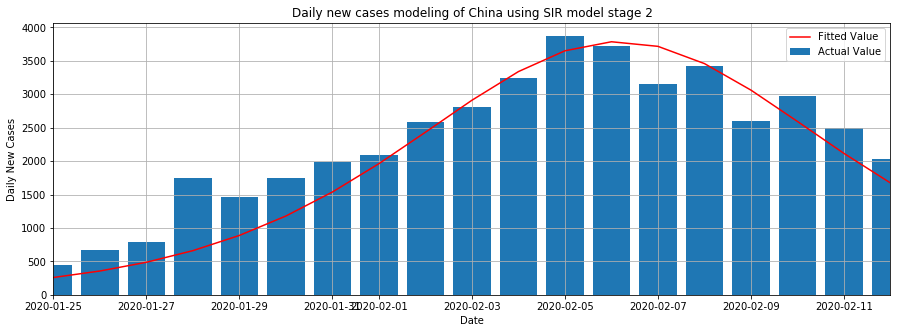

0.8191584658054254

In [13]:
# visualize
vis(2, date_interval2, prediction2, daily_new_cases2)

evaluate(daily_new_cases2, prediction2) # stage 2

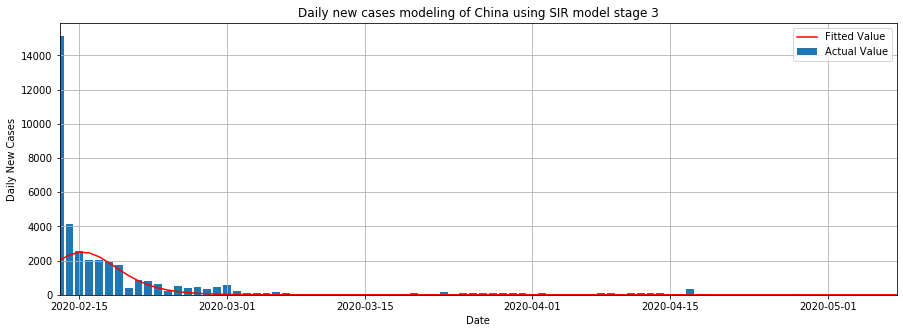

0.30037964186944033

In [15]:
# initial values stage 3
I0_3 = daily_new_cases2[-1]
S0_3 = 1.39449051e+09
R0_3 = pop - I0_3 - S0_3

# solve SIR model
def solve_SIR(t, beta, gamma):
    return integrate.odeint(SIR, [S0_3, I0_3, R0_3], t, args=(beta, gamma))[:,1]

# fit SIR model
popt_sir, pcov_sir = optimize.curve_fit(solve_SIR, t_interval3, daily_new_cases3, maxfev=2000)


# generate date
start_date = country_data3.date.iloc[0]
days = len(t_interval3)
date_interval3 = [(datetime.strptime(start_date, '%Y-%m-%d') + timedelta(days=i)) for i in range(days)]
prediction3 = solve_SIR(t_interval3, *popt_sir)

# visualize
vis(3, date_interval3, prediction3, daily_new_cases3)

evaluate(daily_new_cases3, prediction3) # stage 3

In [16]:
# combine all stages
date_interval = np.concatenate((date_interval1, date_interval2, date_interval3))
prediction = np.concatenate((prediction1, prediction2, prediction3))
daily_new_cases = np.concatenate((daily_new_cases1, daily_new_cases2, daily_new_cases3))

In [17]:
# visualize
def vis_all(time, predict, actual):
    plt.figure(figsize=(15, 5))
    plt.plot(time, predict, c='r', label='Fitted Value')
    plt.bar(time, actual, label='Actual Value')
    plt.title('Daily new cases modeling of ' + country + ' using SIR model ' + 'all stages')
    plt.ylabel('Daily New Cases')
    plt.xlabel('Date')
    plt.xlim(time[0], time[-1])
    plt.grid()
    plt.legend()
    plt.savefig('multi_stage/' + country + '_sir_all.png')
    plt.show()

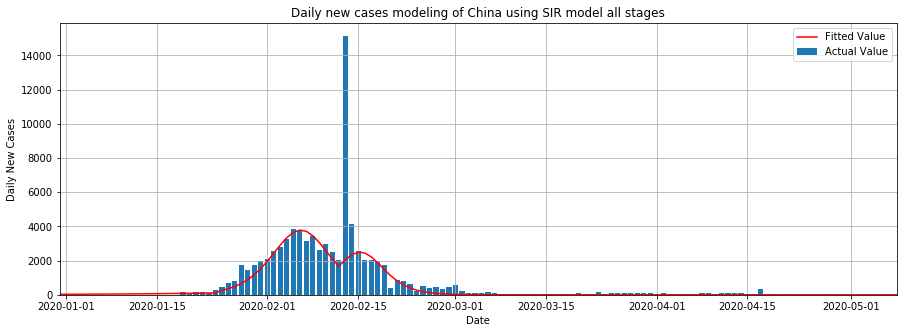

0.4631493020224081

In [18]:
vis_all(date_interval, prediction, daily_new_cases)
evaluate(daily_new_cases, prediction) # all stages